Importando las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importando el archivo de manera local, revisando datos y tipos de datos, tambien se imprimen las 5 primeras filas del dataframe.

In [6]:
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')
df.info()
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

Revisando valores nulos.

In [9]:
valores_nulos = df.isnull().sum().sort_values(ascending=False)
print(valores_nulos)

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64


Obteniendo el numero de casos por país

In [11]:
caso_por_pais = df['Country'].value_counts()
print(caso_por_pais)

Country
India          24
France         24
Japan          22
China          21
USA            21
South Korea    20
UK             20
Germany        17
Canada         16
Australia      15
Name: count, dtype: int64


Obteniendo la IA más usada

In [14]:
top_ia = df['Top AI Tools Used'].value_counts()
print(top_ia)

Top AI Tools Used
Midjourney          37
Claude              31
ChatGPT             31
Stable Diffusion    27
DALL-E              26
Bard                24
Synthesia           24
Name: count, dtype: int64


Top 5 paises en mayor adopción de la IA, mayor perdida de empleos gracias a la IA y mayor incremento gracias a la IA.

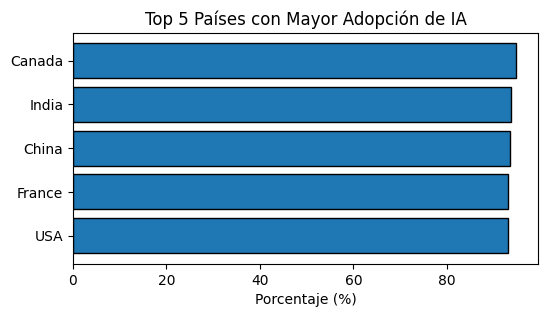

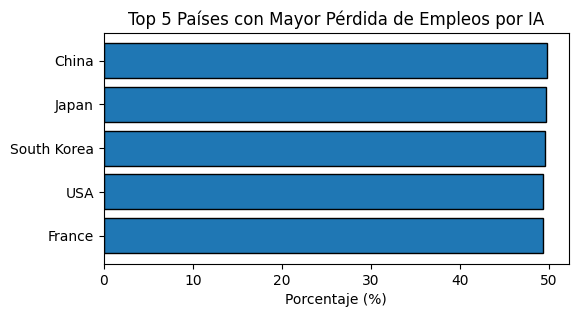

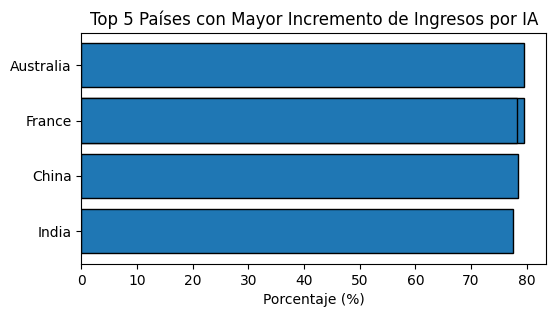

In [19]:
#Función para graficar 3 topings (adopción, pérdida de empleos y mayor incremento de ingresos)
def top5_ranking(df, columna, titulo):
    top5 = df[['Country', columna]].sort_values(by=columna, ascending=False).head(5)

    plt.figure(figsize=(6,3))
    plt.barh(top5['Country'], top5[columna], edgecolor='black')
    plt.xlabel('Porcentaje (%)')
    plt.title(titulo)
    plt.gca().invert_yaxis()  # Para que el top esté arriba
    plt.show()

#imprimiendo adopción
top5_ranking(df, 'AI Adoption Rate (%)', 'Top 5 Países con Mayor Adopción de IA')

#imprimiendo mayor perdida
top5_ranking(df, 'Job Loss Due to AI (%)', 'Top 5 Países con Mayor Pérdida de Empleos por IA')

#imprimiendo mayor incremento
top5_ranking(df, 'Revenue Increase Due to AI (%)', 'Top 5 Países con Mayor Incremento de Ingresos por IA')



Comparativa por industria

Industry
Gaming           60.416296
Education        57.028235
Manufacturing    57.014444
Legal            56.077647
Finance          55.764286
Healthcare       55.734118
Automotive       54.887895
Marketing        54.244211
Retail           47.905714
Media            47.263226
Name: AI Adoption Rate (%), dtype: float64


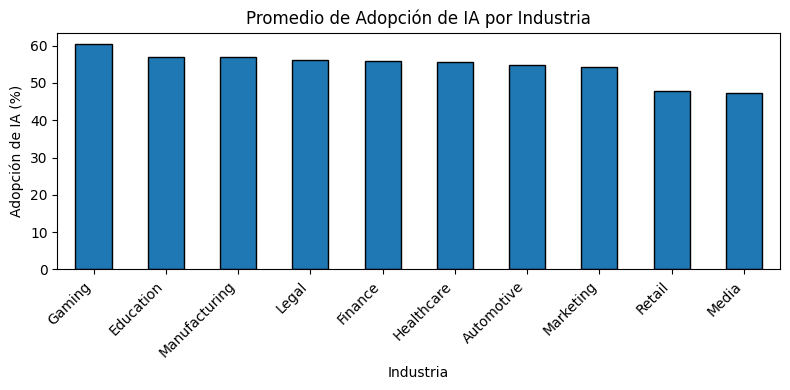

In [24]:
industria_adopcion = df.groupby('Industry')['AI Adoption Rate (%)'].mean().sort_values(ascending=False)
print(industria_adopcion)

#graficando
plt.figure(figsize=(8,4))
industria_adopcion.plot(kind='bar', edgecolor='black')

plt.title('Promedio de Adopción de IA por Industria')
plt.xlabel('Industria')
plt.ylabel('Adopción de IA (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
